In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
cash = pd.read_csv('project_dataset/extract - cash request - data analyst.csv')
fees = pd.read_csv('project_dataset/extract - fees - data analyst - .csv')

## **Cash Request DataFrame Analysis**

In [3]:
cash.info()
#We observe that date columns are not in a dateformat, so lately in the data cleaning process, we will transformt them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

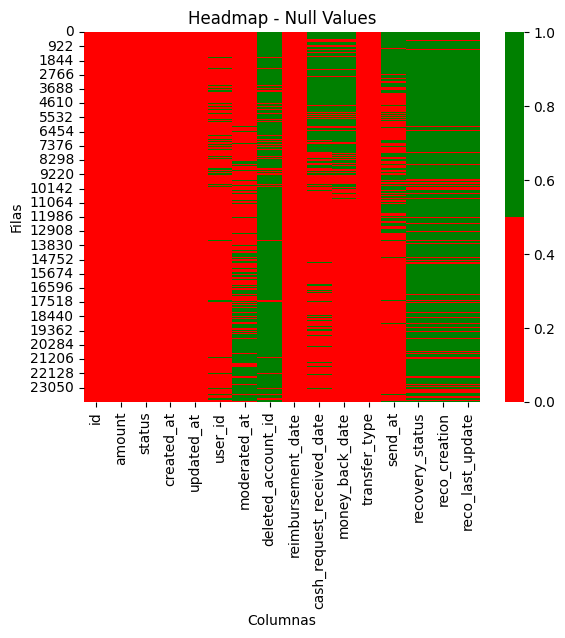

In [4]:
#Creating a headmap to observe null values
cash_null_values = cash.isnull()

colors = {True: 'red', False: 'green'}

sns.heatmap(cash_null_values, cmap=sns.color_palette([colors[True], colors[False]]))

plt.title('Headmap - Null Values')
plt.xlabel('Columnas')
plt.ylabel('Filas')

plt.show()

In [5]:
#Calculating % of null values for each column
nans_columns_cash = ((cash.isnull().sum() / len(cash))*100).sort_values(ascending = False)
nans_columns_cash

deleted_account_id            91.222361
recovery_status               86.107635
reco_creation                 86.107635
reco_last_update              86.107635
moderated_at                  33.103880
cash_request_received_date    32.044222
money_back_date               30.984564
send_at                       30.575720
user_id                        8.773467
id                             0.000000
amount                         0.000000
status                         0.000000
created_at                     0.000000
updated_at                     0.000000
reimbursement_date             0.000000
transfer_type                  0.000000
dtype: float64

#### *Numerical Variable Analysis*

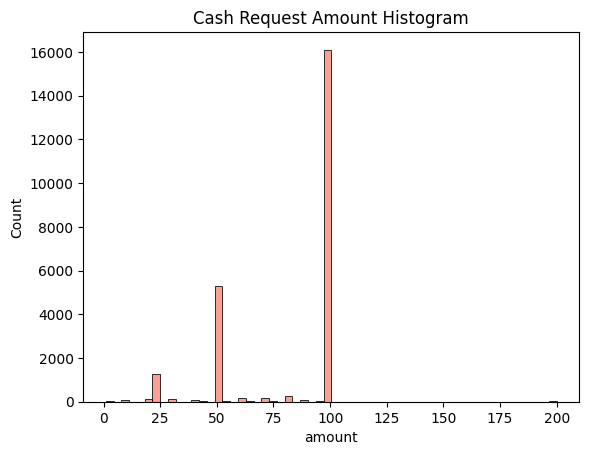

In [6]:
#The amount of cash request is the uniqye numeric variable we consider of interest to analyse its distribution through an histogram. 
sns.histplot(x=cash.amount, color='salmon')
plt.title('Cash Request Amount Histogram')
plt.show()

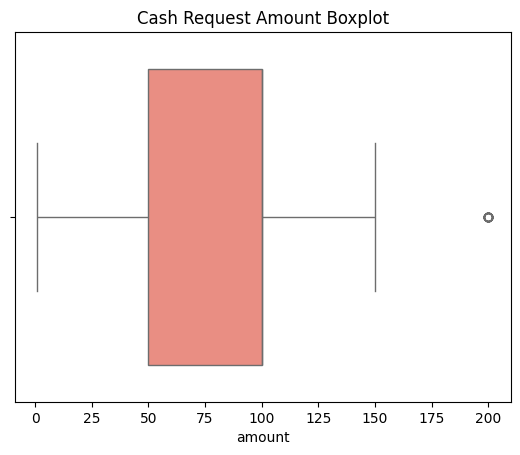

In [7]:
#Generating a boxplot to identify outliers
sns.boxplot(x="amount", data=cash, color='salmon')
plt.title('Cash Request Amount Boxplot')
plt.show()

In [8]:
#In our data cleaning analysis, we will not consider the amount of 200 as it is not representative.

#### *Categorical Variable Analysis*

status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64


<Axes: title={'center': 'Number of Cash Requests by status'}, xlabel='status'>

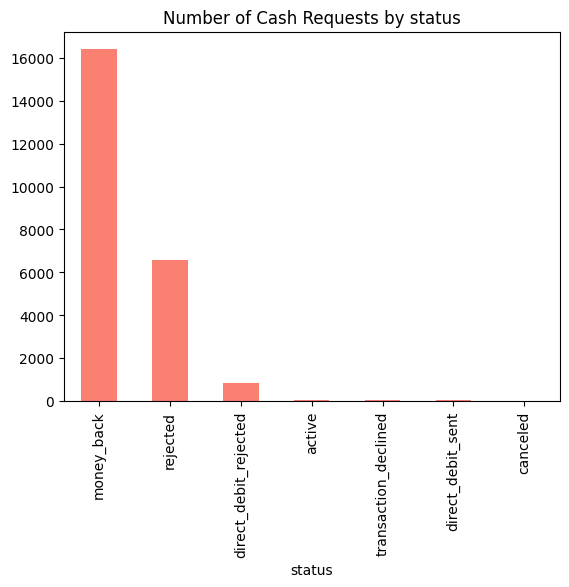

In [9]:
# Calculating the total number of cash requests by status
status_count = cash["status"].value_counts()
print(status_count)
status_count.plot(kind="bar", color="salmon", title="Number of Cash Requests by status")

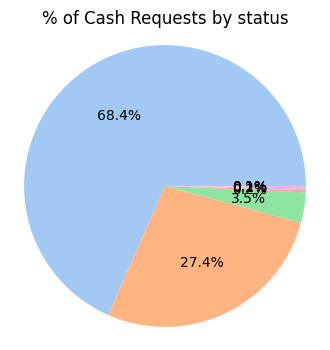

In [10]:
plt.figure(figsize=(4, 4))
sns.set_palette("pastel")
plt.pie(status_count, autopct='%1.1f%%')
plt.title('% of Cash Requests by status')
plt.axis('equal')
plt.show()

transfer_type
instant    13882
regular    10088
Name: count, dtype: int64


<Axes: title={'center': 'Number of Cash Requests by Transfer type'}, xlabel='transfer_type'>

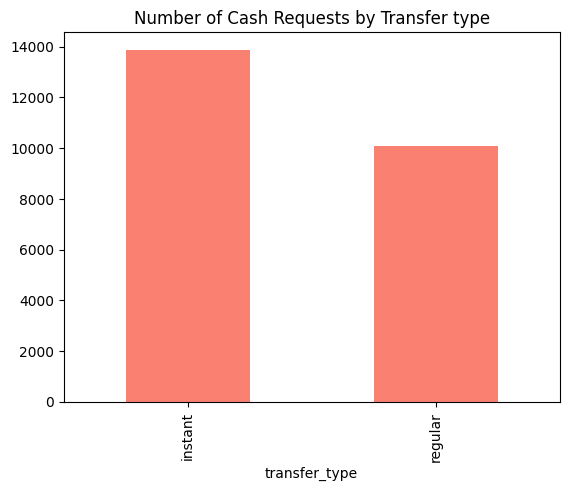

In [11]:
type_count = cash["transfer_type"].value_counts()
print(type_count)
type_count.plot(kind="bar", color="salmon", title="Number of Cash Requests by Transfer type")

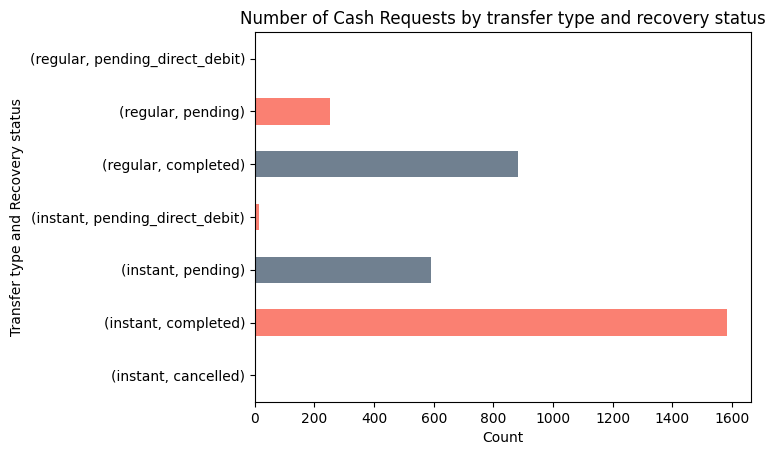

In [12]:
cash.groupby(["transfer_type", "recovery_status"])["recovery_status"].count().plot(kind="barh",color=["slategray", "salmon"])

plt.title('Number of Cash Requests by transfer type and recovery status')
plt.xlabel('Count')
plt.ylabel('Transfer type and Recovery status')
plt.show()

In [13]:
#We can observe a great number of incidents when instant payment than regular one.

## **Fees DataFrame Analysis**

In [14]:
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


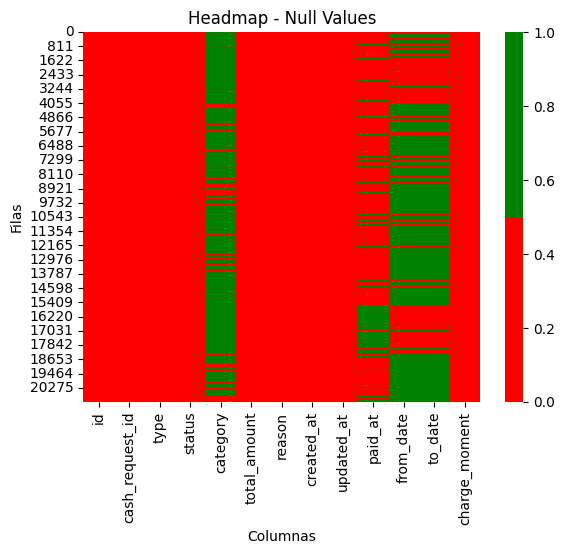

In [15]:
#Creating a headmap to observe null values
fees_null_values = fees.isnull()

colores = {True: 'red', False: 'green'}

sns.heatmap(fees_null_values, cmap=sns.color_palette([colores[True], colores[False]]))

plt.title('Headmap - Null Values')
plt.xlabel('Columnas')
plt.ylabel('Filas')

plt.show()

In [16]:
#Calculating % of null values for each column
fees_null_values = ((fees.isnull().sum() / len(fees))*100).sort_values(ascending = False)
fees_null_values

category           89.573145
from_date          63.126157
to_date            63.126157
paid_at            26.257063
cash_request_id     0.018992
id                  0.000000
type                0.000000
status              0.000000
total_amount        0.000000
reason              0.000000
created_at          0.000000
updated_at          0.000000
charge_moment       0.000000
dtype: float64

#### *Numerical Variable Analysis*

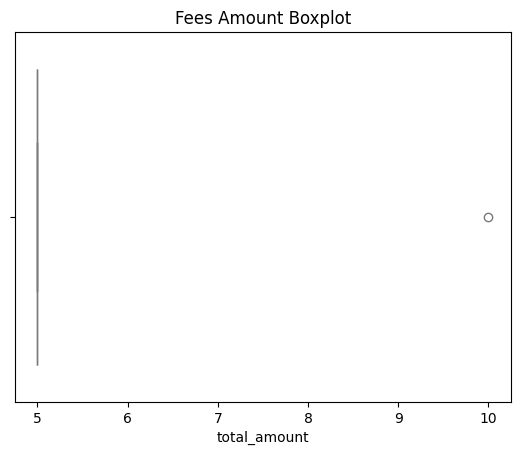

In [17]:
#Creating a boxplot to see the distribution of the numerical variable of interest
sns.boxplot(x="total_amount", data=fees)
plt.title('Fees Amount Boxplot')
plt.show()

In [18]:
fee_type_count = fees["total_amount"].value_counts()
fee_type_count
#In out data cleaning process, we will delete this outlier of amount 10.

total_amount
5.0     21060
10.0        1
Name: count, dtype: int64

#### *Categorical Variable Analysis*

type
instant_payment    11099
postpone            7766
incident            2196
Name: count, dtype: int64


<Axes: title={'center': 'Number of fees by Type'}, xlabel='type'>

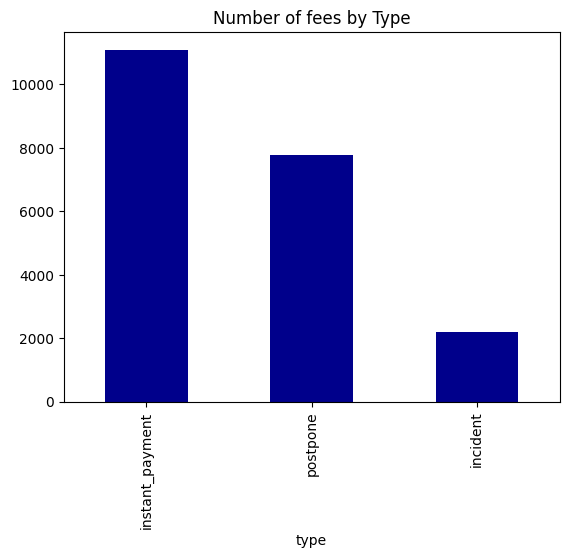

In [19]:
fee_type_count = fees["type"].value_counts()
print(fee_type_count)
fee_type_count.plot(kind="bar", color="darkblue", title="Number of fees by Type")

charge_moment
after     16724
before     4337
Name: count, dtype: int64


<Axes: title={'center': 'Number of Fees by Charge_moment'}, xlabel='transfer_type'>

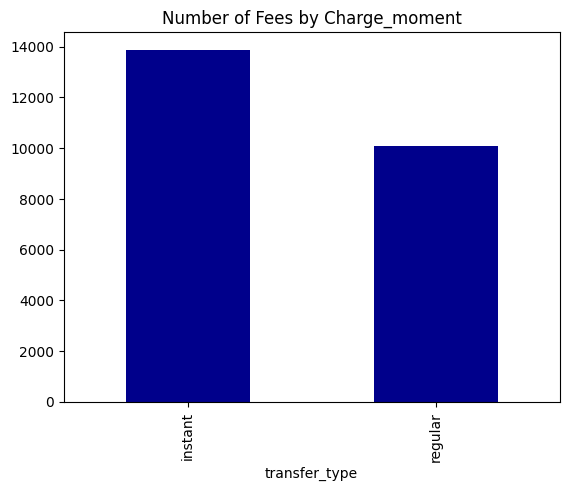

In [20]:
fee_type_count = fees["charge_moment"].value_counts()
print(fee_type_count)
type_count.plot(kind="bar", color="darkblue", title="Number of Fees by Charge_moment")

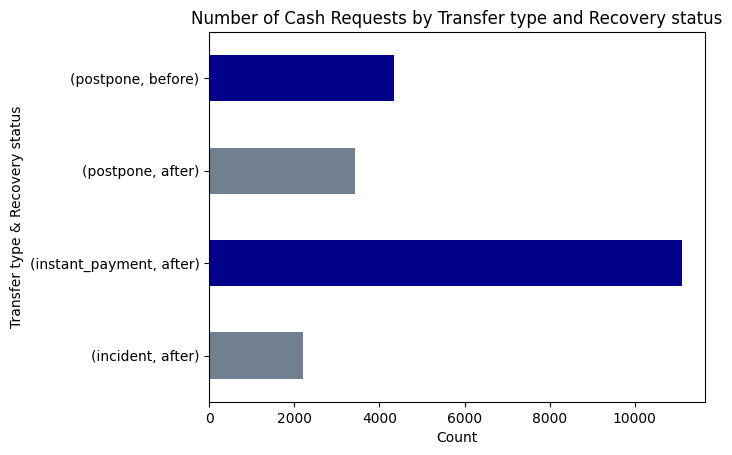

In [21]:
#Combination of the two variables
fees.groupby(["type", "charge_moment"])["id"].count().plot(kind="barh",color=["slategray", "darkblue"])

plt.title('Number of Cash Requests by Transfer type and Recovery status')
plt.xlabel('Count')
plt.ylabel('Transfer type & Recovery status')
plt.show()